# Minería de datos
## Práctica de visualización
### Base a trabajar: Autos - Consumo Gasolina México
#### URL: https://www.kaggle.com/checoalejandro/autos-consumo-gasolina-mexico
#### Integrantes del Equipo 10, grupo 003:
- Andrea Isabel Cortez Sánchez 1736472
- Sergio Oviedo Martínez 1750532
- Andrés Hernandez de Luna 1757180
- Johan Antonio Sustaita Martinez 1723476

## Inicia actividad:
### Mandamos llamar a nuestra base de datos.
- Realizamos algunas acciones para poder visualizar y trabajar mejor.

Quisimos manejar el pequeño resumen desde el principio para ver las diferencias a lo largo del trabajo.

In [14]:
import pandas as pd
import numpy as np 
data1 = pd.read_excel("/Users/SERGIO/Documents/Mineria de datos/Consumo Gasolina Autos Ene 2018.xlsx")
data=data1.rename(columns = {'CO2(g/km)':'emision CO2','Calificación Gas Ef. Inv.':'Calif Efecto Inv',
                             'Calificación Contam. Aire':'Calif Contam Aire','NOx (g/1000km)':'emision NOx'})
data.describe()

,Modelo,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),emision CO2,emision NOx,Calif Efecto Inv
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.00000,4617.000000,4617.000000
mean,2014.187351,5.329218,254.991553,2.869923,10.604934,16.612749,13.183803,9.887754,256.53368,30.803552,4.885207
std,2.162132,1.800226,132.791017,1.347559,3.285876,4.186279,3.603346,2.702537,75.57912,56.901643,2.484840
min,2011.000000,3.000000,60.000000,0.898000,3.100000,6.700000,4.960000,3.720000,107.00000,0.000000,0.000000
25%,2012.000000,4.000000,150.000000,1.800000,8.200000,13.480000,10.460000,7.850000,200.00000,10.000000,3.000000
50%,2014.000000,4.000000,220.000000,2.500000,10.420000,16.390000,12.870000,9.650000,243.00000,17.000000,5.000000
75%,2016.000000,6.000000,330.000000,3.600000,12.810000,19.600000,15.610000,11.710000,299.00000,28.000000,7.000000
max,2018.000000,12.000000,888.000000,8.400000,27.460000,31.300000,28.930000,21.700000,627.00000,724.000000,10.000000


- Trabajaremos los datos enfocados a los tipos de rendimientos. Rendimiento de Ciudad, en carretera y por último redimiento de combustible. 


###### Rendimiento en Ciudad
Calculamos ciertas medidas de dispersión como lo son la varianza, la mediana y la desviación estándar y el promedio.


In [36]:
rcp = data["R. Ciudad (km/l)"].groupby(data["Marca"]).mean().sort_values(ascending=False)
print("El promedio por",rcp,"\n\nEl promedio en general del rendimiento en ciudad es",rcp.mean())

rcv = data["R. Ciudad (km/l)"].groupby(data["Marca"]).var().sort_values(ascending=False)
print("\n\nLa varianza por",rcv,"\n\nLa varianza en general del rendimiento en ciudad es",rcv.var())

rcde = data["R. Ciudad (km/l)"].groupby(data["Marca"]).std().sort_values(ascending=False)
print("\n\nLa desviación estándar por",rcde,"\n\nLa desviación estándar en general del rendimiento en ciudad es",rcde.std())

rcm = data["R. Ciudad (km/l)"].groupby(data["Marca"]).median().sort_values(ascending=False)
print("\n\nLa mediana por",rcm,"\n\nLa mediana en general del rendimiento en ciudad es",rcm.median())

El promedio por Marca
SMART          18.745484
SEAT           14.082381
FIAT           13.487465
SUZUKI         13.268933
HYUNDAI        13.099818
KIA            13.008667
MAZDA          12.791625
MINI           12.617244
VW             12.195799
GML            12.180000
SUBARU         12.062338
CHEVROLET      11.746824
FORD           11.670039
NISSAN         11.367598
MITSUBISHI     11.325385
ALFA ROMEO     11.178824
HONDA          11.041773
AUDI           10.853962
TOYOTA         10.829457
PEUGEOT        10.667363
RENAULT        10.624043
MERCURY        10.200000
BUICK          10.127333
DODGE           9.920076
INFINITI        9.781091
VOLVO           9.320988
ACURA           9.203731
PORSCHE         9.178095
CHRYSLER        9.047187
BMW             9.009401
CADILLAC        8.662468
JEEP            8.486988
MERCEDES        8.442086
LINCOLN         8.414706
GMC             8.331379
LEXUS           8.055000
SAAB            7.510000
LAND ROVER      6.882000
JAGUAR          5.988485
BEN

Continuamos con la interpretación del valor de asimetría.
- Nos damos cuenta que el valor de asimetría general es un valor 'positivo' y esto nos indica que la distribución de nuestros datos están sesgados hacia la izquierda.
   

In [37]:
rcva= data["R. Ciudad (km/l)"].groupby(data["Marca"]).skew().sort_values(ascending=False)
print("El valor de asimetría por",rcva,"\n\nEl valor de asimetría en general del rendimiento en ciudad es",rcva.skew())

El valor de asimetría por Marca
KIA            3.048448e+00
PEUGEOT        2.340640e+00
FORD           1.657426e+00
DODGE          1.396816e+00
LAND ROVER     1.381185e+00
INFINITI       1.172258e+00
MITSUBISHI     1.150964e+00
TOYOTA         1.078140e+00
JAGUAR         1.065348e+00
BMW            8.143909e-01
HONDA          6.747031e-01
CHEVROLET      6.368849e-01
ROLLSROYCE     5.598966e-01
MERCEDES       5.021523e-01
ACURA          4.983227e-01
VOLVO          4.678471e-01
MINI           4.317446e-01
BUICK          4.309365e-01
LINCOLN        4.109775e-01
SUZUKI         3.717887e-01
CADILLAC       3.687804e-01
JEEP           2.956996e-01
VW             1.663907e-01
CHRYSLER       1.637941e-01
BENTLEY        1.551544e-01
RENAULT        1.662107e-02
GML           -3.706461e-15
AUDI          -2.050039e-02
LAMBORGHINI   -2.382590e-02
SMART         -1.942435e-01
MAZDA         -2.199242e-01
SUBARU        -2.299403e-01
PORSCHE       -2.326255e-01
NISSAN        -2.362014e-01
HYUNDAI       -2

###### Rendimiento en carretera
Calculamos ciertas medidas de dispersión como lo son la varianza, la mediana y la desviación estándar y el promedio.


In [39]:
rcp1 = data["R. Carr. (km/l)"].groupby(data["Marca"]).mean().sort_values(ascending=False)
print("El promedio por",rcp1,"\n\nEl promedio en general del rendimiento en ciudad es",rcp1.mean())

rcv1 = data["R. Carr. (km/l)"].groupby(data["Marca"]).var().sort_values(ascending=False)
print("\n\nLa varianza por",rcv1,"\n\nLa varianza en general del rendimiento en ciudad es",rcv1.var())

rcde1 = data["R. Carr. (km/l)"].groupby(data["Marca"]).std().sort_values(ascending=False)
print("\n\nLa desviación estándar por",rcde1,"\n\nLa desviación estándar en general del rendimiento en ciudad es",rcde1.std())

rcm1 = data["R. Carr. (km/l)"].groupby(data["Marca"]).median().sort_values(ascending=False)
print("\n\nLa mediana por",rcm1,"\n\nLa mediana en general del rendimiento en ciudad es",rcm1.median())

El promedio por Marca
SMART          25.372903
SEAT           22.688286
MINI           19.481102
VW             19.362602
MAZDA          19.068125
FIAT           18.900986
KIA            18.802222
CHEVROLET      18.512601
SUZUKI         18.484267
ALFA ROMEO     18.465882
HYUNDAI        18.267818
PEUGEOT        18.076923
SUBARU         17.881039
HONDA          17.431084
FORD           17.398794
AUDI           17.299976
GML            16.675000
BUICK          16.637667
RENAULT        16.626809
NISSAN         16.499069
MITSUBISHI     16.190577
VOLVO          16.044568
ACURA          15.784925
BMW            15.275581
SAAB           15.270000
DODGE          15.135954
CHRYSLER       15.020938
MERCURY        14.800000
PORSCHE        14.639786
TOYOTA         14.609022
INFINITI       14.588182
MERCEDES       14.358128
CADILLAC       14.225974
GMC            13.610000
LINCOLN        13.010000
JEEP           12.510964
LEXUS          12.390000
JAGUAR         12.295455
LAND ROVER     10.288000
BEN

Continuamos con la interpretación del valor de asimetría.
- Nos damos cuenta que el valor de asimetría general es un valor 'positivo' y esto nos indica que la distribución de nuestros datos están sesgados hacia la izquierda.
   

In [40]:
rcva1= data["R. Carr. (km/l)"].groupby(data["Marca"]).skew().sort_values(ascending=False)
print("El valor de asimetría por",rcva1,"\n\nEl valor de asimetría en general del rendimiento en ciudad es",rcva1.skew())

El valor de asimetría por Marca
PEUGEOT        1.688052
DODGE          1.259602
LAND ROVER     0.950985
SAAB           0.835843
MITSUBISHI     0.793408
MINI           0.771924
FORD           0.538042
JAGUAR         0.529652
AUDI           0.453203
JEEP           0.434547
ACURA          0.421129
CHRYSLER       0.412496
INFINITI       0.407513
KIA            0.372792
ROLLSROYCE     0.347455
BMW            0.320737
TOYOTA         0.320353
MERCEDES       0.303584
VOLVO          0.260832
CADILLAC       0.197738
SUZUKI         0.128077
RENAULT        0.117358
CHEVROLET      0.110126
BENTLEY        0.074368
SUBARU         0.022125
VW             0.016727
SMART          0.014778
GML            0.000000
PORSCHE       -0.072211
HONDA         -0.131509
LINCOLN       -0.179024
NISSAN        -0.198400
MAZDA         -0.241523
BUICK         -0.261520
GMC           -0.558126
SEAT          -0.584366
FIAT          -0.588956
ALFA ROMEO    -0.816197
HYUNDAI       -1.038349
LAMBORGHINI   -1.061732
LEXUS   

###### Rendimiento de combustible
Calculamos ciertas medidas de dispersión como lo son la varianza, la mediana y la desviación estándar y el promedio.


In [42]:
rcp2 = data["R. Comb. (km/l)"].groupby(data["Marca"]).mean().sort_values(ascending=False)
print("El promedio por",rcp2,"\n\nEl promedio en general del rendimiento en ciudad es",rcp2.mean())

rcv2 = data["R. Comb. (km/l)"].groupby(data["Marca"]).var().sort_values(ascending=False)
print("\n\nLa varianza por",rcv2,"\n\nLa varianza en general del rendimiento en ciudad es",rcv2.var())

rcde2 = data["R. Comb. (km/l)"].groupby(data["Marca"]).std().sort_values(ascending=False)
print("\n\nLa desviación estándar por",rcde2,"\n\nLa desviación estándar en general del rendimiento en ciudad es",rcde2.std())

rcm2 = data["R. Comb. (km/l)"].groupby(data["Marca"]).median().sort_values(ascending=False)
print("\n\nLa mediana por",rcm2,"\n\nLa mediana en general del rendimiento en ciudad es",rcm2.median())

El promedio por Marca
SMART          22.464194
SEAT           17.168667
FIAT           16.169718
MINI           16.153858
KIA            15.880667
MAZDA          15.676500
HYUNDAI        15.544364
SUZUKI         15.393467
VW             14.965987
GML            14.522500
ALFA ROMEO     14.511765
SUBARU         14.398831
FORD           14.301556
PEUGEOT        14.244286
CHEVROLET      14.163243
HONDA          14.089704
NISSAN         13.601078
RENAULT        13.523191
AUDI           13.301958
MITSUBISHI     13.262115
VOLVO          12.349630
TOYOTA         12.347826
BUICK          12.278000
BMW            12.276779
ACURA          12.194776
DODGE          11.866260
MERCURY        11.860000
MERCEDES       11.582086
INFINITI       11.554909
PORSCHE        11.200429
SAAB           11.055000
CHRYSLER       11.047188
CADILLAC       10.507143
LEXUS          10.210000
LINCOLN        10.185686
GMC            10.181379
JEEP           10.109759
LAND ROVER      9.081250
JAGUAR          8.797273
ROL

Continuamos con la interpretación del valor de asimetría.
- Nos damos cuenta que el valor de asimetría general es un valor 'positivo' y esto nos indica que la distribución de nuestros datos están sesgados hacia la izquierda.

In [43]:
rcva2= data["R. Comb. (km/l)"].groupby(data["Marca"]).skew().sort_values(ascending=False)
print("El valor de asimetría por",rcva2,"\n\nEl valor de asimetría en general del rendimiento en ciudad es",rcva2.skew())

El valor de asimetría por Marca
PEUGEOT        2.274571
KIA            1.347189
DODGE          1.332437
INFINITI       1.214536
MITSUBISHI     0.977279
FORD           0.855601
ACURA          0.752088
TOYOTA         0.690946
MINI           0.688390
JAGUAR         0.666136
BMW            0.533372
ROLLSROYCE     0.533038
HONDA          0.463634
LAND ROVER     0.461303
CHEVROLET      0.435441
MERCEDES       0.418273
LINCOLN        0.386194
CADILLAC       0.309251
AUDI           0.290643
JEEP           0.285679
VOLVO          0.276853
VW             0.270156
PORSCHE        0.260520
CHRYSLER       0.164295
BUICK          0.153525
SUZUKI         0.075096
RENAULT        0.057972
BENTLEY        0.053136
GML            0.011614
SUBARU        -0.052563
FIAT          -0.102362
NISSAN        -0.148109
MAZDA         -0.172061
SEAT          -0.286034
SMART         -0.291684
LAMBORGHINI   -0.331836
HYUNDAI       -0.454993
SAAB          -0.495421
GMC           -0.582895
ALFA ROMEO    -0.779470
LEXUS   

- Relacionamos nuestras columnas.

In [44]:
print("La correlación de nuestros datos",data.corr(),"\n\ny la covarianza dada por",data.cov())

La correlación de nuestros datos                     Modelo  Cilindros  Potencia (HP)  Tamaño (L)  \
Modelo            1.000000  -0.086090       0.031713   -0.107840   
Cilindros        -0.086090   1.000000       0.871348    0.916349   
Potencia (HP)     0.031713   0.871348       1.000000    0.866862   
Tamaño (L)       -0.107840   0.916349       0.866862    1.000000   
R. Ciudad (km/l)  0.276963  -0.714183      -0.713813   -0.761904   
R. Carr. (km/l)   0.275443  -0.688890      -0.681128   -0.750172   
R. Comb. (km/l)   0.277631  -0.727857      -0.728198   -0.791193   
R. Ajust. (km/l)  0.277600  -0.727901      -0.728250   -0.791228   
emision CO2      -0.271247   0.800239       0.737591    0.835417   
emision NOx      -0.035411  -0.084007      -0.137597   -0.079683   
Calif Efecto Inv  0.268483  -0.774895      -0.733530   -0.835165   

                  R. Ciudad (km/l)  R. Carr. (km/l)  R. Comb. (km/l)  \
Modelo                    0.276963         0.275443         0.277631   
Cilind

Al tener muchos datos, tenemos que ver a detalle cuales son de nuestro interés para así concluir sobre la relación de una columna con otra.

In [3]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
reviews = pd.read_excel("/Users/SERGIO/Documents/Mineria de datos/Consumo Gasolina Autos Ene 2018.xlsx", index_col=0)
reviews.head(3)

,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
Marca,,,,,,,,,,,,,,,,,
FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),2015,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,5,10,9
FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,0,10,9
FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,2017,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123,2,10,9


In [17]:
reviews.columns

Index(['Submarca', 'Versión', 'Modelo', 'Trans.', 'Comb.', 'Cilindros',
       'Potencia (HP)', 'Tamaño (L)', 'Categoría', 'R. Ciudad (km/l)',
       'R. Carr. (km/l)', 'R. Comb. (km/l)', 'R. Ajust. (km/l)', 'CO2(g/km)',
       'NOx (g/1000km)', 'Calificación Gas Ef. Inv.',
       'Calificación Contam. Aire'],
      dtype='object')

## Grafica de barras y datos categoricos

In [20]:
reviews.plot.bar()

<AxesSubplot:>

Error in callback <function flush_figures at 0x00000000093DCD30> (for post_execute):


KeyboardInterrupt: 

ya que son demasiados datos nuestras computadoras solo se quedan cargando

<AxesSubplot:>

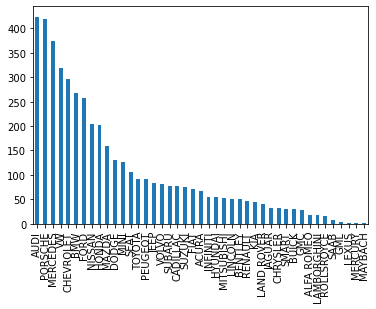

In [22]:
reviews['Marca'].value_counts().plot.bar()

Aqui podemos observar la cantidad de autos que mas se registran y gracias a que son pocos modelos se puede apreciar muy bien.

<AxesSubplot:>

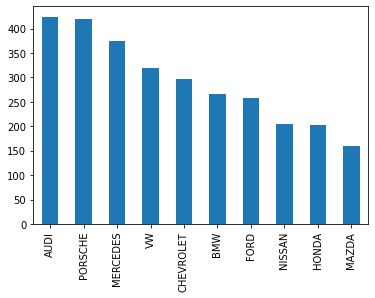

In [23]:
reviews['Marca'].value_counts().head(10).plot.bar()

En esta grafica se puede vizualisar mucho mejor la informacion.

<AxesSubplot:>

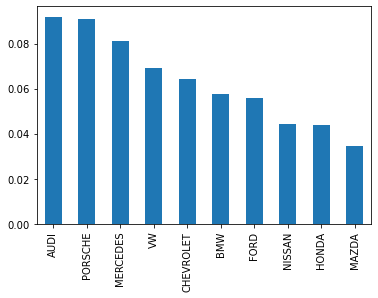

In [24]:
(reviews['Marca'].value_counts().head(10) / len(reviews)).plot.bar()

<AxesSubplot:>

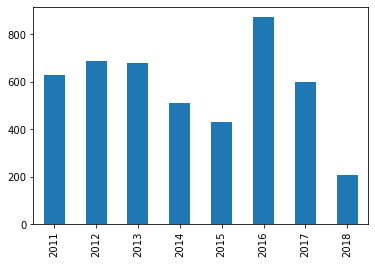

In [25]:
reviews['Modelo'].value_counts().sort_index().plot.bar()

Aqui observamos que la mayoria de los modelos que se encuentran registrados son del 2016.

### Graficas de Lineas

<AxesSubplot:>

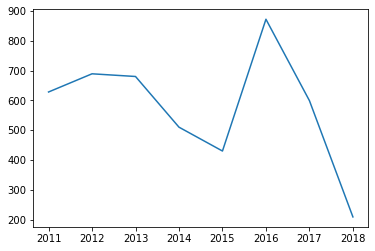

In [27]:
reviews['Modelo'].value_counts().sort_index().plot.line()

<AxesSubplot:>

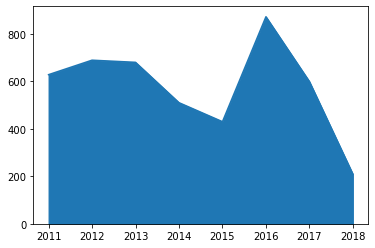

In [28]:
reviews['Modelo'].value_counts().sort_index().plot.area()

Aqui podemos ver un grafica de lineas y el siguiente relleno, ambos representan lo mismo solo hay que saber interpretarlo

### Histogramas

<AxesSubplot:ylabel='Frequency'>

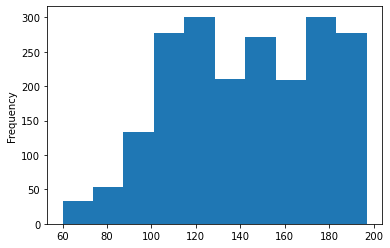

In [31]:
reviews[reviews['Potencia (HP)'] < 200]['Potencia (HP)'].plot.hist()

Se puede observar la potencia de los autos.

<AxesSubplot:ylabel='Frequency'>

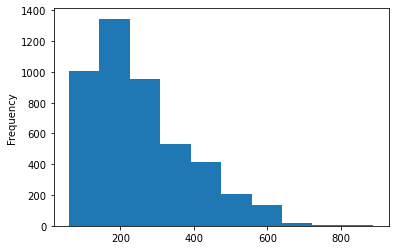

In [32]:
reviews['Potencia (HP)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

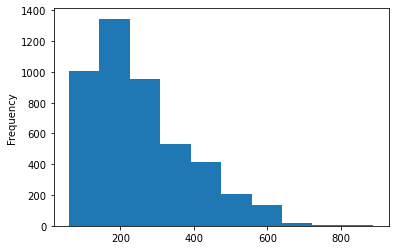

In [33]:
reviews['Potencia (HP)'].plot.hist()

Graficar datos bi-Variantes

<AxesSubplot:xlabel='Potencia (HP)', ylabel='Calif Contam Aire'>

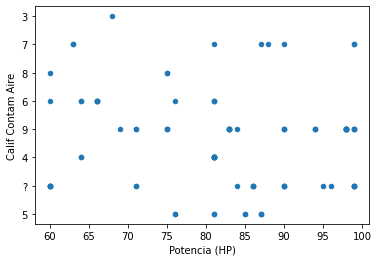

In [34]:
reviews[reviews['Potencia (HP)'] < 100].sample(100).plot.scatter(x='Potencia (HP)', y='Calif Contam Aire')

Podemos observar que los datos se encuentran muy variados esto quiere decir que la potencia de los autos no influye con la calificacion contaminante del aire

<AxesSubplot:xlabel='Potencia (HP)', ylabel='Cilindros'>

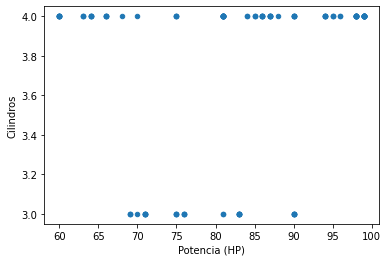

In [38]:
reviews[reviews['Potencia (HP)'] < 100].plot.scatter(x='Potencia (HP)', y='Cilindros')

<AxesSubplot:xlabel='Potencia (HP)', ylabel='Cilindros'>

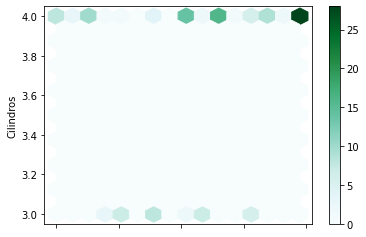

In [40]:
reviews[reviews['Potencia (HP)'] < 100].plot.hexbin(x='Potencia (HP)', y='Potencia (HP)', gridsize=15)

<AxesSubplot:xlabel='Potencia (HP)', ylabel='Potencia (HP)'>

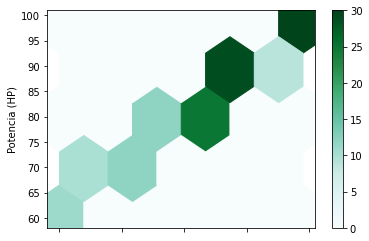

In [41]:
reviews[reviews['Potencia (HP)'] < 100].plot.hexbin(x='Potencia (HP)', y='Potencia (HP)', gridsize=5)

### Stacked plots

In [5]:
wine_counts = pd.read_excel("/Users/SERGIO/Documents/Mineria de datos/Consumo Gasolina Autos Ene 2018.xlsx",index_col=0)

In [44]:
wine_counts.head()

,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
Marca,,,,,,,,,,,,,,,,,
FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),2015,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,5,10,9
FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,0,10,9
FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,2017,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123,2,10,9
FORD,FUSION,HIBRIDO 4PTAS 2.0L 4CIL 188HP AUT eCVT,2018,AUT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123,2,10,9
FORD,FUSION,HYBRID 4PTS 2.5L 4CIL 156HP CVT,2011,CVT,Gasolina,4,156,2.5,AUTOS COMPACTOS,24.00,21.90,23.01,17.26,135,5,9,9


In [7]:
wine_counts.plot.bar(stacked=True)

<AxesSubplot:xlabel='Marca'>

Error in callback <function flush_figures at 0x0000000008F7ECA0> (for post_execute):


KeyboardInterrupt: 

En esta grafica debido al tamaño de la informacion no se pudo generar.

<AxesSubplot:xlabel='Marca'>

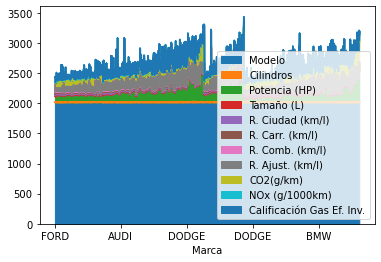

In [9]:
wine_counts.plot.area()

Podemos ver las secciones en base a las marcas de los automoviles

<AxesSubplot:xlabel='Marca'>

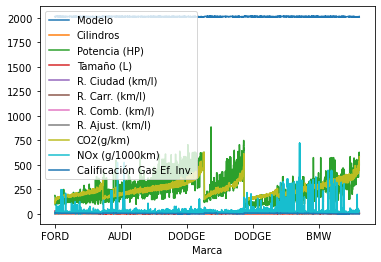

In [18]:
wine_counts.plot.line()

Aqui podemos ver la misma grafica pero sin estar rellenada.

In [21]:
import seaborn as sns

C:\Users\SERGIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cilindros', ylabel='count'>

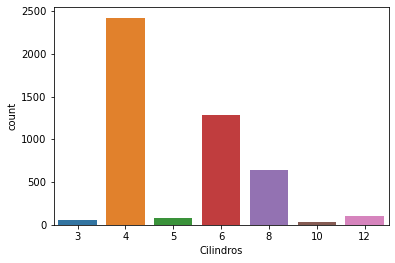

In [26]:
sns.countplot(reviews['Cilindros'])

Aqui podemos observar que la mayoria de los autos cuentan con 4 cilindros

<AxesSubplot:xlabel='Modelo', ylabel='Density'>

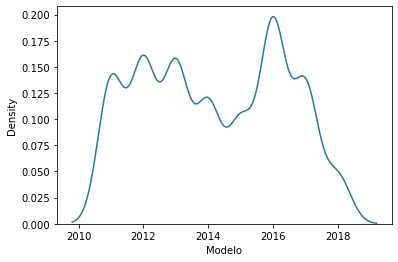

In [37]:
sns.kdeplot(reviews.query('Modelo < 2020').Modelo)

Observamos la cantidad de autos por modelo.

<AxesSubplot:>

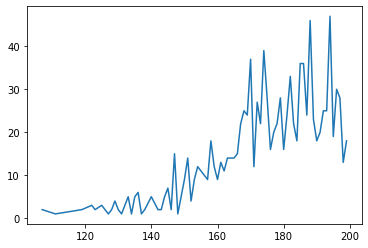

In [38]:
reviews[reviews['CO2(g/km)'] < 200]['CO2(g/km)'].value_counts().sort_index().plot.line()

Aqui podemos ver el promedio de la cantidad de C02 que generan los automoviles

In [39]:
sns.kdeplot(reviews[reviews['CO2(g/km)'] < 200].loc[:, ['CO2(g/km)', 'Modelo']].dropna().sample(5000))

ValueError: Cannot take a larger sample than population when 'replace=False'

C:\Users\SERGIO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2(g/km)'>

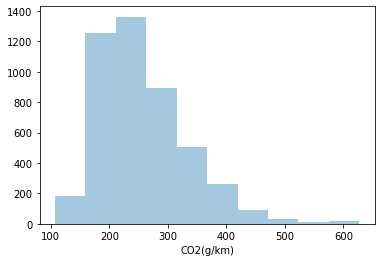

In [40]:
sns.distplot(reviews['CO2(g/km)'], bins=10, kde=False)

Podemos observar cucuantos veiculos producen cierta cantidad de CO2

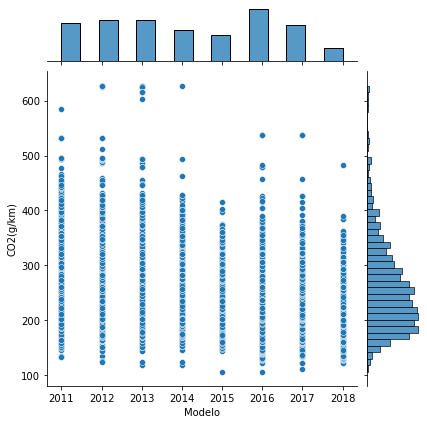

In [43]:
sns.jointplot(x='Modelo', y='CO2(g/km)', data=reviews[reviews['Modelo'] < 2020])

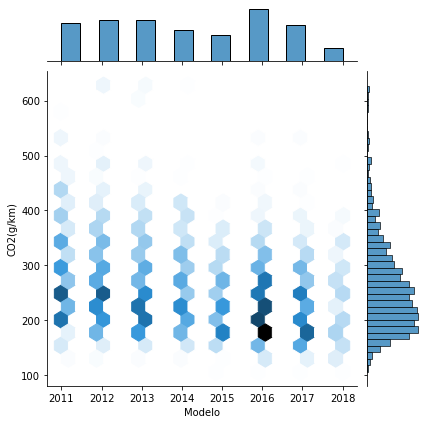

In [44]:
sns.jointplot(x='Modelo', y='CO2(g/km)', data=reviews[reviews['Modelo'] < 2020], kind='hex', 
              gridsize=20)

### Box plots

<AxesSubplot:xlabel='Modelo', ylabel='CO2(g/km)'>

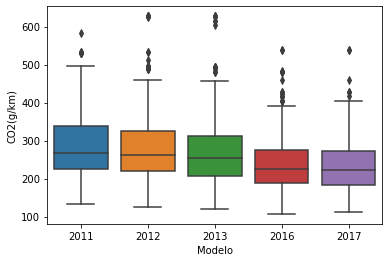

In [47]:
df = reviews[reviews.Modelo.isin(reviews.Modelo.value_counts().head(5).index)]

sns.boxplot(
    x='Modelo',
    y='CO2(g/km)',
    data=df
)

Aqui podemos ver por año un primedio de las emiciones de CO2

<AxesSubplot:xlabel='Modelo', ylabel='CO2(g/km)'>

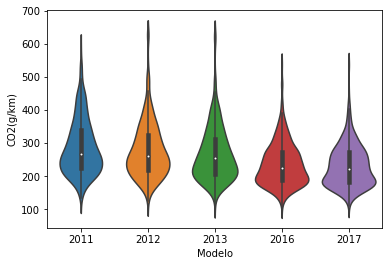

In [48]:
sns.violinplot(
    x='Modelo',
    y='CO2(g/km)',
    data=reviews[reviews.Modelo.isin(reviews.Modelo.value_counts()[:5].index)]
)

In [50]:
import pandas as pd
import pandas_profiling
df = pd.read_excel("/Users/SERGIO/Documents/Mineria de datos/Consumo Gasolina Autos Ene 2018.xlsx")
df.head()

ModuleNotFoundError: No module named 'pandas_profiling'

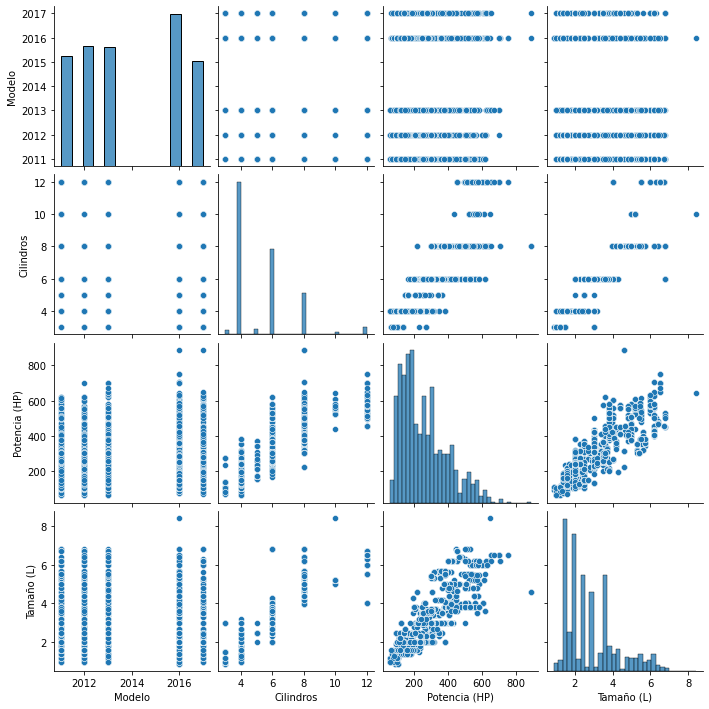

In [51]:
sns.pairplot(df[['Modelo', 'Cilindros', 'Potencia (HP)', 'Tamaño (L)']])

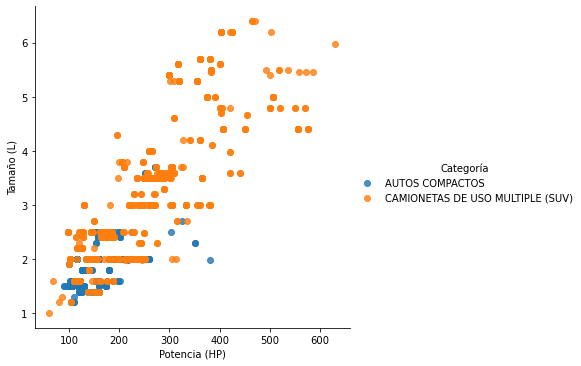

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Potencia (HP)', y='Tamaño (L)', hue='Categoría', 
           data=df.loc[df['Categoría'].isin(['CAMIONETAS DE USO MULTIPLE (SUV)', 'AUTOS COMPACTOS'])], 
           fit_reg=False)

Aqui podemos observar que las camionetas de uso multiple tienen mayor tamaño (L)  esto es normal ya que cuentan con mayor combustible

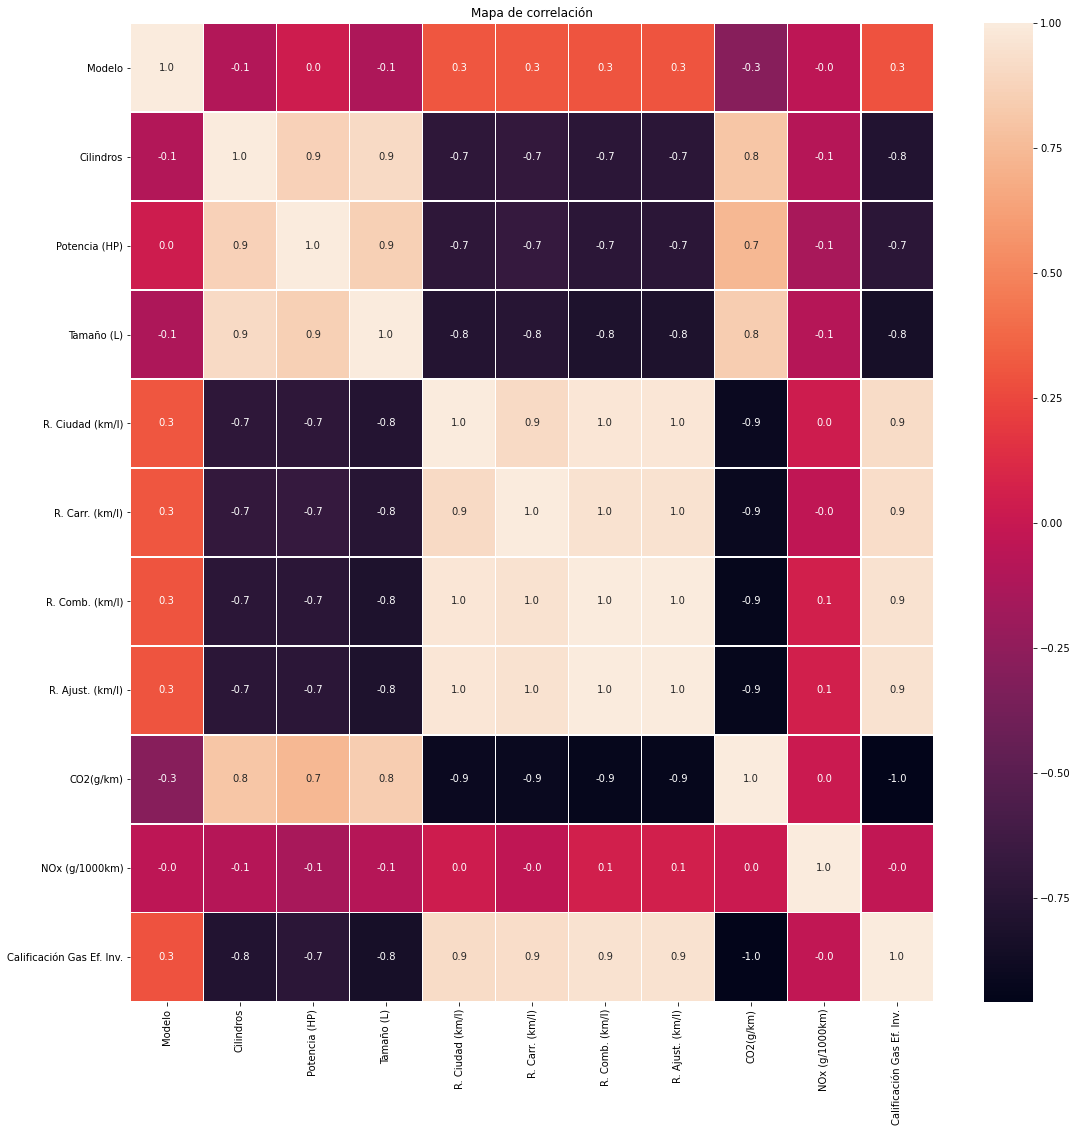

In [54]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()